## Comparing Clusters with Compact Objects: With and Without Companions

In testing the addition of substellar objects into SPISEA, we have come across a curious problem. When generating a cluster with an IMFR and allowing for companions, we end up creating substellar mass compact objects, which does not make much sense. This is happening before modification of the code to specify brown dwarves as their own phase.

#### Importing the Necessary Packages:

In [1]:
# Import necessary packages. 
from spisea import synthetic, evolution, atmospheres, reddening, ifmr
from spisea.imf import imf, multiplicity
import numpy as np
import pylab as py
import pdb
import matplotlib.pyplot as plt
%matplotlib inline

## Cluster 1: Without Companions

In [251]:
# Create isochrone object  
filt_list = ['wfc3,ir,f153m'] # We won't be doing much with synthetic photometry here, so only 1 filter
my_ifmr = ifmr.IFMR_Raithel18()
my_iso = synthetic.IsochronePhot(8, 0, 10,
                                 evo_model = evolution.MergedBaraffePisaEkstromParsec(),
                                      filters=filt_list)

Isochrone generation took 70.910534 s.
Making photometry for isochrone: log(t) = 8.00  AKs = 0.00  dist = 10
     Starting at:  2024-08-16 12:58:00.472284   Usually takes ~5 minutes
Starting filter: wfc3,ir,f153m   Elapsed time: 0.00 seconds
Starting synthetic photometry
M =   0.070 Msun  T =  2794 K  m_hst_f153m = 9.52
M =   0.676 Msun  T =  4395 K  m_hst_f153m = 4.92
M =   0.786 Msun  T =  4896 K  m_hst_f153m = 4.41
M =   0.856 Msun  T =  5198 K  m_hst_f153m = 4.12
M =   0.956 Msun  T =  5590 K  m_hst_f153m = 3.74
M =   1.022 Msun  T =  5808 K  m_hst_f153m = 3.50
M =   1.079 Msun  T =  5992 K  m_hst_f153m = 3.30
M =   1.518 Msun  T =  7482 K  m_hst_f153m = 2.22
M =   4.439 Msun  T = 13246 K  m_hst_f153m = -1.04
M =   4.509 Msun  T = 14299 K  m_hst_f153m = -1.00
M =   5.078 Msun  T =  6015 K  m_hst_f153m = -4.23
      Time taken: 17.50 seconds


In [60]:
# Create IMF objects                                                                                                                                                     
k_imf = imf.Weidner_Kroupa_2004()

In [90]:
# Make cluster
cluster_mass = 10**6
k_cluster = synthetic.ResolvedCluster(my_iso, k_imf, cluster_mass, ifmr=my_ifmr)
t_cluster = synthetic.ResolvedCluster(my_iso, k_imf, cluster_mass)

# Get outputs
k_out = k_cluster.star_systems
t_out = t_cluster.star_systems

Brown dwarf indices: (array([      0,       1,       2, ..., 1037624, 1037625, 1037626]),), Masses:         mass        
--------------------
0.010581623004327498
 0.07746106089705293
 0.06953880412693926
 0.07376813803092074
0.018112506487775234
 0.05924633227110841
   0.076323411257296
                 ...
0.021666218437430496
0.026539284794723627
 0.07170977037349016
0.018694133568115678
 0.04969517873307298
 0.07788710880030814
 0.01568523000869492
Length = 1020837 rows
Found 925805 stars out of mass range


In [303]:
print(k_out[p_bd])
print(np.max(k_out[p_bd]['mass']))
print(np.min(k_out[p_bd]['mass']))

        mass         isMultiple ... metallicity m_hst_f153m
-------------------- ---------- ... ----------- -----------
0.010581623004327498      False ...         0.0         nan
 0.07746106089705293      False ...         0.0         nan
 0.06953880412693926      False ...         0.0         nan
 0.07376813803092074      False ...         0.0         nan
0.018112506487775234      False ...         0.0         nan
 0.05924633227110841      False ...         0.0         nan
   0.076323411257296      False ...         0.0         nan
                 ...        ... ...         ...         ...
0.021666218437430496      False ...         0.0         nan
0.026539284794723627      False ...         0.0         nan
 0.07170977037349016      False ...         0.0         nan
0.018694133568115678      False ...         0.0         nan
 0.04969517873307298      False ...         0.0         nan
 0.07788710880030814      False ...         0.0         nan
 0.01568523000869492      False ...     

In [50]:
np.min(k_out[p_wd]['mass'])

5.311164368442878

### Exploring the properties of k_cluster

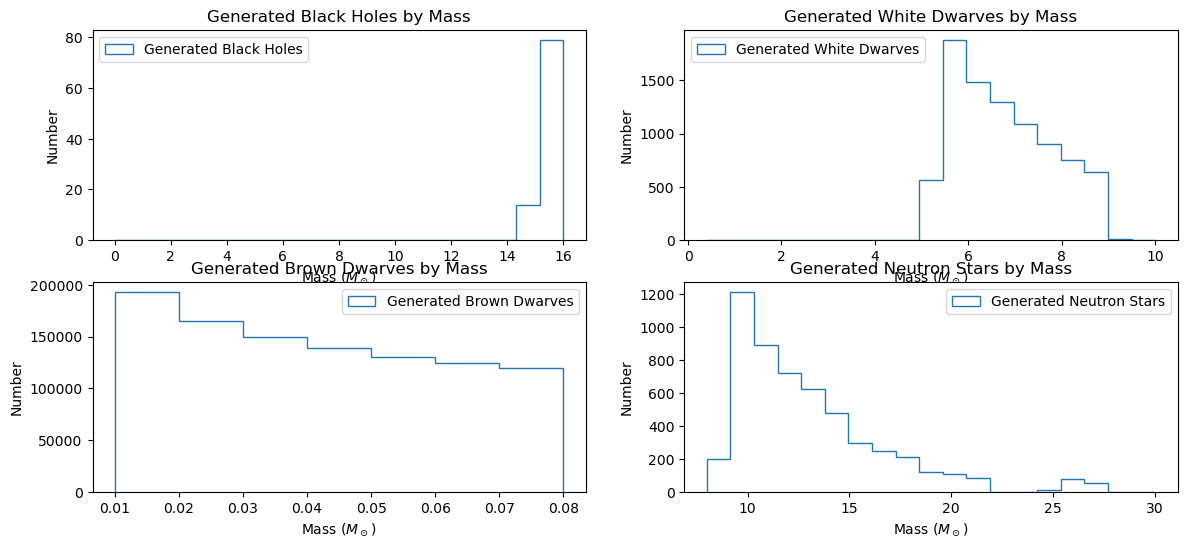

In [109]:
# Locate BHs, NSs and WDs
p_bh = np.where(k_out['phase'] == 103)[0]
p_ns = np.where(k_out['phase'] == 102)[0]
p_wd = np.where(k_out['phase'] == 101)[0]
p_bd = np.where(k_out['phase'] == 99)[0]

# Plot on histograms
bh_bins = np.linspace(0.01, 16, 20)
wd_bins = np.linspace(0.4, 10, 20)
bd_bins = np.linspace(0.01, 0.08, 8)
ns_bins = np.linspace(8, 30, 20)

plt.figure(figsize=(14,6))
plt.subplot(2, 2, 1)
plt.hist(k_out[p_bh]['mass'], histtype = 'step',
        bins = bh_bins, label = 'Generated Black Holes')
plt.title("Generated Black Holes by Mass")
plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('Number')
plt.legend()

plt.subplot(2, 2, 2)
plt.hist(k_out[p_wd]['mass'], histtype = 'step',
        bins = wd_bins, label = 'Generated White Dwarves')
plt.title("Generated White Dwarves by Mass")
plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('Number')
plt.legend()

plt.subplot(2, 2, 3)
plt.hist(k_out[p_bd]['mass'], histtype = 'step',
        bins = bd_bins, label = 'Generated Brown Dwarves')
plt.title("Generated Brown Dwarves by Mass")
plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('Number')
plt.legend()

plt.subplot(2, 2, 4)
plt.hist(k_out[p_ns]['mass'], histtype = 'step',
        bins = ns_bins, label = 'Generated Neutron Stars')
plt.title("Generated Neutron Stars by Mass")
plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('Number')
plt.legend()

plt.show()

In [110]:
# Checking that objects are in the correct mass ranges
print("BH max mass: " + str(np.max(k_out[p_bh]['mass'])))
print("BH min mass: " + str(np.min(k_out[p_bh]['mass'])) + '\n')

print("NS max mass: " + str(np.max(k_out[p_ns]['mass'])))
print("NS min mass: " + str(np.min(k_out[p_ns]['mass'])) + '\n')

print("WD max mass: " + str(np.max(k_out[p_wd]['mass'])))
print("WD min mass: " + str(np.min(k_out[p_wd]['mass'])) + '\n')

print("BD max mass: " + str(np.max(k_out[p_bd]['mass'])))
print("BH min mass: " + str(np.min(k_out[p_bd]['mass'])) + '\n')

BH max mass: 118.75715744712116
BH min mass: 15.035041823555424

NS max mass: 119.72357017983377
NS min mass: 9.000593434639391

WD max mass: 8.999786895675784
WD min mass: 5.311134878018857

BD max mass: 0.07999987827752757
BH min mass: 0.010000034092785876



In [111]:
#check to see if large NS are Wolf-Rayet
print(k_out['isWR'].dtype)
large_NS = np.where((k_out[p_ns]['mass']) > 15)
print(k_out['isWR'][large_NS])

float64
isWR
----
 0.0
 0.0
 nan
 0.0
 nan
 0.0
 0.0
 ...
 0.0
 nan
 nan
 0.0
 0.0
 0.0
 nan
Length = 1378 rows


I am unsure on what the 0.0 and nan values correspond to.

In [115]:
#check out the large NSs
print(k_out[p_ns][large_NS])
print(k_out[p_ns]['isWR'][large_NS])
print(np.unique(k_out['isWR']))
print(np.unique(k_out[p_ns]['isWR'][large_NS]))
print(k_out[p_ns]['mass_current'][large_NS])

       mass        isMultiple     systemMass     ... metallicity m_hst_f153m
------------------ ---------- ------------------ ... ----------- -----------
 87.01978581314896      False  87.01978581314896 ...         0.0         nan
 80.51538949145795      False  80.51538949145795 ...         0.0         nan
 21.33585631479835      False  21.33585631479835 ...         0.0         nan
17.635459786720876      False 17.635459786720876 ...         0.0         nan
20.277517524928232      False 20.277517524928232 ...         0.0         nan
 20.66032231704192      False  20.66032231704192 ...         0.0         nan
27.227632523655107      False 27.227632523655107 ...         0.0         nan
               ...        ...                ... ...         ...         ...
 62.70378845410619      False  62.70378845410619 ...         0.0         nan
 20.88687294620209      False  20.88687294620209 ...         0.0         nan
20.379813469500725      False 20.379813469500725 ...         0.0         nan

In [293]:
print(k_out['mass_current'][p_bd])
print(k_out['mass'][p_bd])

    mass_current    
--------------------
0.010581623004327498
 0.07746106089705293
 0.06953880412693926
 0.07376813803092074
0.018112506487775234
 0.05924633227110841
   0.076323411257296
                 ...
0.021666218437430496
0.026539284794723627
 0.07170977037349016
0.018694133568115678
 0.04969517873307298
 0.07788710880030814
 0.01568523000869492
Length = 1020837 rows
        mass        
--------------------
0.010581623004327498
 0.07746106089705293
 0.06953880412693926
 0.07376813803092074
0.018112506487775234
 0.05924633227110841
   0.076323411257296
                 ...
0.021666218437430496
0.026539284794723627
 0.07170977037349016
0.018694133568115678
 0.04969517873307298
 0.07788710880030814
 0.01568523000869492
Length = 1020837 rows


Assuming our assumption is correct, that the anomalous neutron stars are WR stars because of the huge disrepancy in initial and final masses.

1.6520719390653884
1.058140703674423
119.72357017983377
15.00328698949453


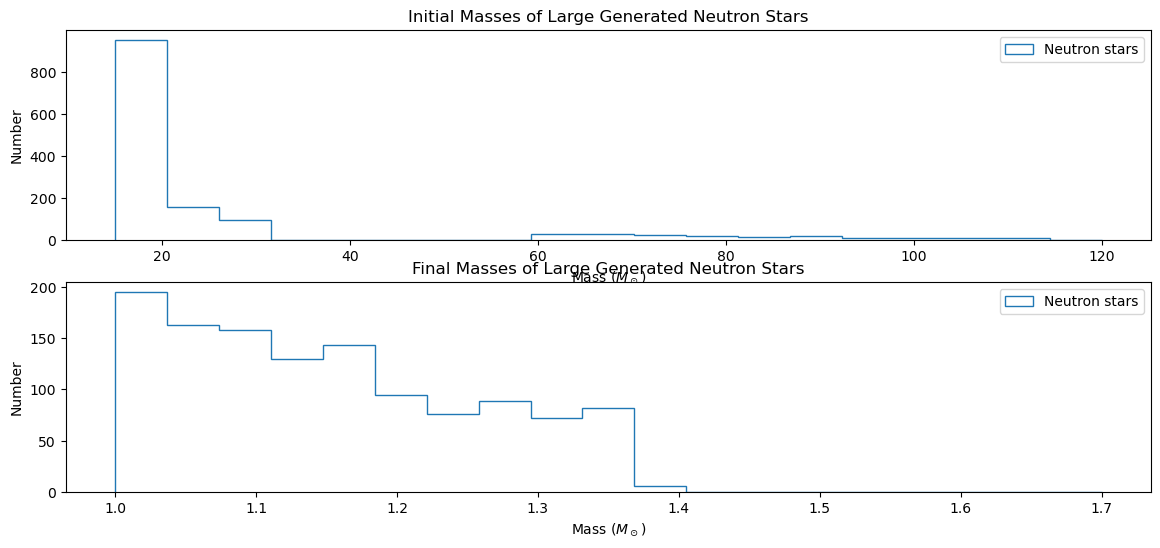

In [120]:
#inital masses of large NS and final masses
print(np.max(k_out[p_ns]['mass_current'][large_NS]))
print(np.min(k_out[p_ns]['mass_current'][large_NS]))
print(np.max(k_out[p_ns]['mass'][large_NS]))
print(np.min(k_out[p_ns]['mass'][large_NS]))

#create bins
initial_bins = np.linspace(15, 120, 20)
final_bins = np.linspace(1.0, 1.7, 20)

plt.figure(figsize=(14,6))
plt.subplot(2, 1, 1)
plt.hist(k_out[p_ns]['mass'][large_NS], histtype = 'step',
        bins = initial_bins, label = 'Neutron stars')
plt.title("Initial Masses of Large Generated Neutron Stars")
plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('Number')
plt.legend()

plt.subplot(2, 1, 2)
plt.hist(k_out[p_wd]['mass_current'][large_NS], histtype = 'step',
        bins = final_bins, label = 'Neutron stars')
plt.title("Final Masses of Large Generated Neutron Stars")
plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('Number')
plt.legend()

Filtered Masses:         mass       
------------------
  0.76799007770147
1.1955031412949875
2.2249813543703456
 3.660007844283093
0.8470178943035628
0.8619046086355177
0.8153335900401504
               ...
0.9029881664660251
0.5385601472294455
0.5055061897257748
0.6718807496769587
0.7515013567753969
0.7974747944530974
 1.030318707836774
Length = 391228 rows
phase
-----
  1.0
  1.0
  1.0
  1.0
  1.0
  1.0
  1.0
  ...
  1.0
  1.0
  1.0
  1.0
  1.0
  1.0
  1.0
Length = 391228 rows
   mass_current   
------------------
  0.76799007770147
1.1955031412949875
2.2249813543703456
 3.660007844283093
0.8470178943035628
0.8619046086355177
0.8153335900401504
               ...
0.9029881664660251
0.5385601472294455
0.5055061897257748
0.6718807496769587
0.7515013567753969
0.7974747944530974
 1.030318707836774
Length = 391228 rows


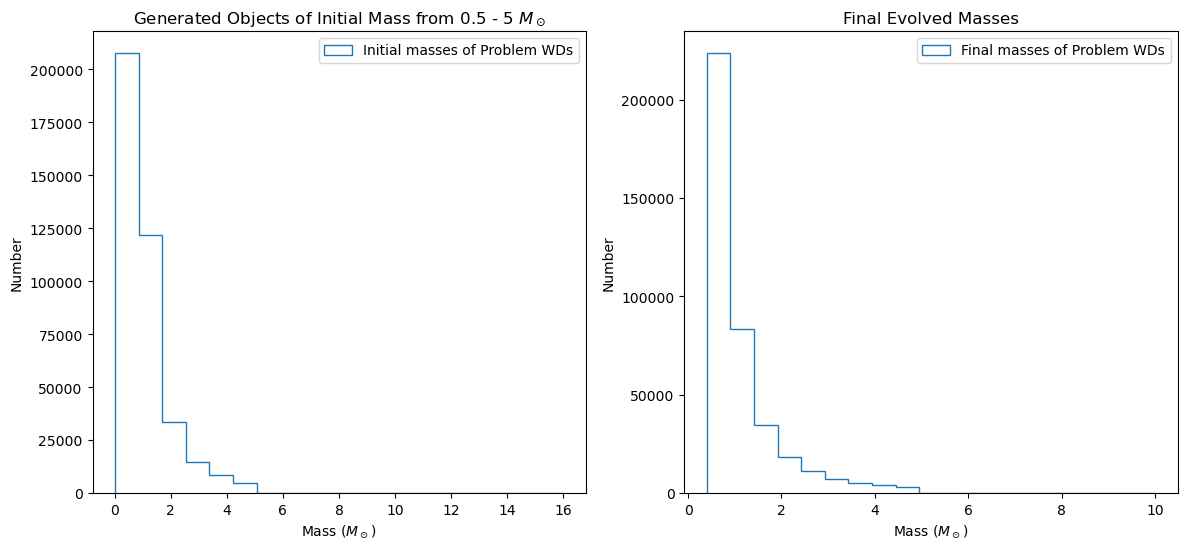

In [86]:
#check out the masses within the problem range for white dwarfs
wd_issue_masses = np.where((k_out['mass'] >=0.5) & (k_out['mass'] <5))
print("Filtered Masses: ", k_out['mass'][wd_issue_masses])
print(k_out['phase'][wd_issue_masses])
print(k_out['mass_current'][wd_issue_masses])

plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
plt.hist(k_out['mass'][wd_issue_masses], histtype = 'step',
        bins = bh_bins, label = 'Initial masses of Problem WDs')
plt.title("Generated Objects of Initial Mass from 0.5 - 5 $M_\odot$")
plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('Number')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(k_out['mass_current'][wd_issue_masses], histtype = 'step',
        bins = wd_bins, label = 'Final masses of Problem WDs')
plt.title("Final Evolved Masses")
plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('Number')
plt.legend()

This tells us that there are issues in accurately identifying white dwarf stars and neutron stars. White dwarves have an issue at lower masses, and neutron stars at the upper end.

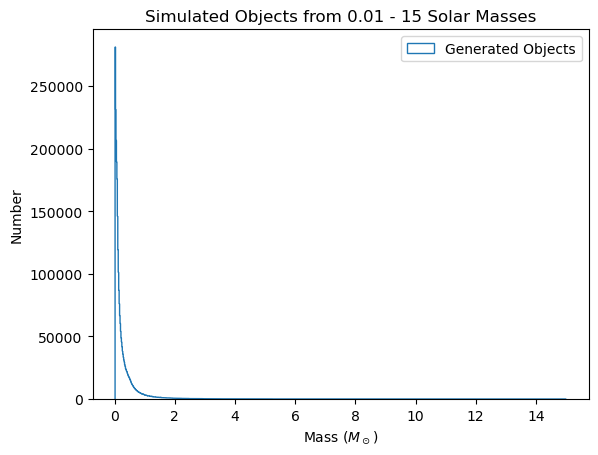

In [32]:
mass_bins = np.linspace(0.01, 15, 1000)
plt.figure()
plt.hist(k_out['mass'], histtype = 'step',
        bins = mass_bins, label = 'Generated Objects')
plt.title("Simulated Objects from 0.01 - 15 Solar Masses")
plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('Number')
plt.legend()

plt.show()

In [28]:
print(np.min(k_out[p_wd]['mass']))
print(np.max(k_out[p_wd]['mass'])) #white dwarf ranges are messed up

5.311625251702762
8.999671191854413


In [11]:
# Finding the minimum mass of a generated object
print("Smallest mass of a generated object: " + str(np.min(k_out['mass'])))

Smallest mass of a generated object: 0.010000000568115546


In [12]:
# Finding the minimum/maximum inital mass of generated black holes
print("Initial mass of smallest generated black hole: " + str(np.min(k_out[p_bh]['mass'])))
print("Initial mass of largest generated black hole: " + str(np.max(k_out[p_bh]['mass'])))

Initial mass of smallest generated black hole: 15.002331855265554
Initial mass of largest generated black hole: 118.99598033857916


This cluster fits the expectation from imfr.py that black holes are between 15-120 solar masses and white dwarves are at least 0.5 solar masses, even with the addition of substellar primary objects. 

### Exploring the t_cluster and comparing to troubleshoot

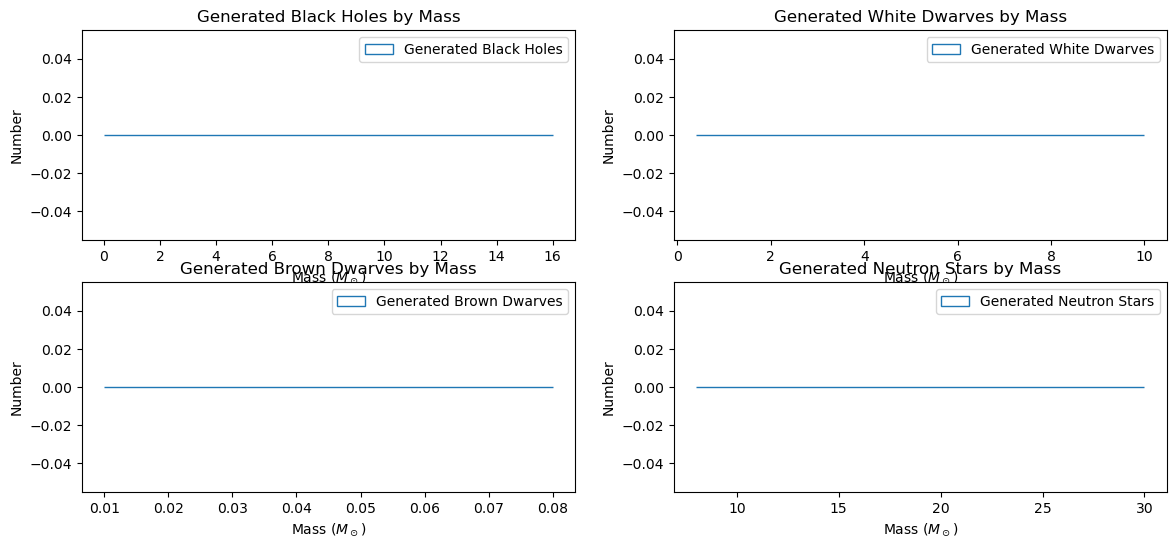

In [91]:
# Locate BHs, NSs and WDs
t_bh = np.where(t_out['phase'] == 103)[0]
t_ns = np.where(t_out['phase'] == 102)[0]
t_wd = np.where(t_out['phase'] == 101)[0]
t_bd = np.where(t_out['phase'] == 99)[0]

# Plot on histograms
bh_bins = np.linspace(0.01, 16, 20)
wd_bins = np.linspace(0.4, 10, 20)
bd_bins = np.linspace(0.01, 0.08, 8)
ns_bins = np.linspace(8, 30, 20)

plt.figure(figsize=(14,6))
plt.subplot(2, 2, 1)
plt.hist(t_out[t_bh]['mass'], histtype = 'step',
        bins = bh_bins, label = 'Generated Black Holes')
plt.title("Generated Black Holes by Mass")
plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('Number')
plt.legend()

plt.subplot(2, 2, 2)
plt.hist(t_out[t_wd]['mass'], histtype = 'step',
        bins = wd_bins, label = 'Generated White Dwarves')
plt.title("Generated White Dwarves by Mass")
plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('Number')
plt.legend()

plt.subplot(2, 2, 3)
plt.hist(t_out[t_bd]['mass'], histtype = 'step',
        bins = bd_bins, label = 'Generated Brown Dwarves')
plt.title("Generated Brown Dwarves by Mass")
plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('Number')
plt.legend()

plt.subplot(2, 2, 4)
plt.hist(t_out[t_ns]['mass'], histtype = 'step',
        bins = ns_bins, label = 'Generated Neutron Stars')
plt.title("Generated Neutron Stars by Mass")
plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('Number')
plt.legend()

plt.show()

### Exploring an Older Cluster

Hopefully, in exploring an older cluster, we will see lower mass white dwarves, as they will have enough time to evolve into white dwarves at this point.

In [121]:
# Create isochrone object  
filt_list = ['wfc3,ir,f153m'] # We won't be doing much with synthetic photometry here, so only 1 filter
my_ifmr = ifmr.IFMR_Raithel18()
o_iso = synthetic.IsochronePhot(10, 0, 10,
                                 evo_model = evolution.MergedBaraffePisaEkstromParsec(),
                                      filters=filt_list)

Changing to logg=5.00 for T=  2306 logg=5.22
Isochrone generation took 17.886188 s.
Making photometry for isochrone: log(t) = 10.00  AKs = 0.00  dist = 10
     Starting at:  2024-08-13 14:04:23.149590   Usually takes ~5 minutes
Starting filter: wfc3,ir,f153m   Elapsed time: 0.00 seconds
Starting synthetic photometry
M =   0.090 Msun  T =  2306 K  m_hst_f153m = 10.90
M =   1.034 Msun  T =  3906 K  m_hst_f153m = -3.64
M =   1.038 Msun  T =  3301 K  m_hst_f153m = -5.55
      Time taken: 3.33 seconds


In [122]:
# Make cluster
cluster_mass = 10**6
o_cluster = synthetic.ResolvedCluster(o_iso, k_imf, cluster_mass, ifmr=my_ifmr)

# Get outputs
o_out = o_cluster.star_systems

/opt/mambaforge3/envs/astro/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/opt/mambaforge3/envs/astro/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


Brown dwarf indices: (array([      0,       1,       3, ..., 1183119, 1183120, 1183121]),), Masses:         mass        
--------------------
 0.06279592698333637
 0.07112795900232521
 0.07376225324790554
 0.03432324440866939
0.018997543688358758
0.052852687409104974
 0.03463925596802796
                 ...
 0.06347447823132187
 0.05466348135014649
0.061140370362200006
 0.01896811961118919
 0.06440976267517402
 0.04168622996255112
0.010201719779934896
Length = 1028674 rows
Found 108643 stars out of mass range


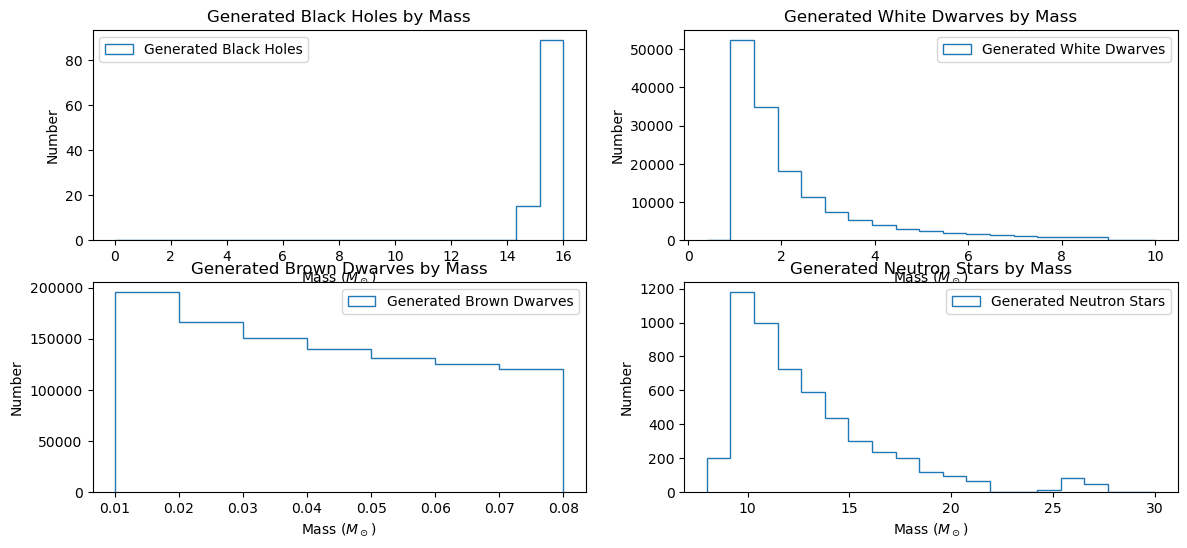

In [124]:
# Locate BHs, NSs and WDs
o_bh = np.where(o_out['phase'] == 103)[0]
o_ns = np.where(o_out['phase'] == 102)[0]
o_wd = np.where(o_out['phase'] == 101)[0]
o_bd = np.where(o_out['phase'] == 99)[0]

# Plot on histograms
bh_bins = np.linspace(0.01, 16, 20)
wd_bins = np.linspace(0.4, 10, 20)
bd_bins = np.linspace(0.01, 0.08, 8)
ns_bins = np.linspace(8, 30, 20)

plt.figure(figsize=(14,6))
plt.subplot(2, 2, 1)
plt.hist(o_out[o_bh]['mass'], histtype = 'step',
        bins = bh_bins, label = 'Generated Black Holes')
plt.title("Generated Black Holes by Mass")
plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('Number')
plt.legend()

plt.subplot(2, 2, 2)
plt.hist(o_out[o_wd]['mass'], histtype = 'step',
        bins = wd_bins, label = 'Generated White Dwarves')
plt.title("Generated White Dwarves by Mass")
plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('Number')
plt.legend()

plt.subplot(2, 2, 3)
plt.hist(o_out[o_bd]['mass'], histtype = 'step',
        bins = bd_bins, label = 'Generated Brown Dwarves')
plt.title("Generated Brown Dwarves by Mass")
plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('Number')
plt.legend()

plt.subplot(2, 2, 4)
plt.hist(o_out[o_ns]['mass'], histtype = 'step',
        bins = ns_bins, label = 'Generated Neutron Stars')
plt.title("Generated Neutron Stars by Mass")
plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('Number')
plt.legend()

plt.show()

In [127]:
# exploring the mass limits to generated WDs
print(np.min(o_out[o_wd]['mass']))
print(np.max(o_out[o_wd]['mass']))

1.0382949743021217
8.999575157847088


This is more expected, suggesting our unexpected results for white dwarf masses were due to the age of the cluster itself and not designation issues.

In [141]:
#exploring high mass NSs
large_o_NS = np.where((o_out[o_ns]['mass']) > 15)
print(o_out[o_ns][large_o_NS])
print(o_out[o_ns]['isWR'][large_o_NS])
print(np.unique(o_out['isWR']))
print(np.unique(o_out[o_ns]['isWR'][large_o_NS]))
print(o_out[o_ns]['mass_current'][large_o_NS])

       mass        isMultiple     systemMass     ... metallicity m_hst_f153m
------------------ ---------- ------------------ ... ----------- -----------
15.284314934206362      False 15.284314934206362 ...         0.0         nan
  17.1290304145272      False   17.1290304145272 ...         0.0         nan
 18.95921354685369      False  18.95921354685369 ...         0.0         nan
18.896393352954313      False 18.896393352954313 ...         0.0         nan
20.962240635300414      False 20.962240635300414 ...         0.0         nan
15.026617026908085      False 15.026617026908085 ...         0.0         nan
 76.13596178064363      False  76.13596178064363 ...         0.0         nan
               ...        ...                ... ...         ...         ...
 26.37054586898205      False  26.37054586898205 ...         0.0         nan
15.233818106481106      False 15.233818106481106 ...         0.0         nan
 19.36143672592774      False  19.36143672592774 ...         0.0         nan

## Cluster 2: With Companions

For this cluster we are using the same isochrone as Cluster 1, just changing our IMF to allow for systems with companions.

In [286]:
# Create IMF objects                                                                                                                                                     
imf_multi = multiplicity.MultiplicityUnresolved()
kc_imf = imf.Weidner_Kroupa_2004(multiplicity=imf_multi)

In [295]:
# Make cluster
cluster_mass = 10**6
kc_cluster = synthetic.ResolvedCluster(my_iso, kc_imf, cluster_mass, ifmr=my_ifmr)

# Get outputs
kc_out = kc_cluster.star_systems
kc_comp = kc_cluster.companions

Brown dwarf indices: (array([     0,      1,      2, ..., 785354, 785355, 785356]),), Masses:         mass        
--------------------
 0.07436657463591295
 0.06125115718404527
 0.07066751592079368
 0.07200706369071531
0.051506088266653524
 0.05929272238807183
0.049112273019809714
                 ...
 0.05799495176694396
0.031994021368442954
 0.06802099845333169
 0.06670578411126206
0.010433044273147809
0.030634450496813445
0.020885281173972783
Length = 772665 rows
Brown dwarf indices: (array([], dtype=int64),), Masses: mass
----
Found 175616 companions out of stellar mass range


In [285]:
print(kc_comp['mass'], kc_comp['Teff'])
print(len(kc_comp[c_bd]))

        mass        
--------------------
0.022827194847619314
 0.10638031764197846
 0.03760679268091785
 0.22726350815590202
0.038753074343781856
  0.2504904685642538
 0.03951772983956194
                 ...
0.012231927508833364
   0.072612764979889
  0.1961780248469474
 0.08736265118080355
 0.07659346659266889
    1.19594339645191
  1.1853661916226508
Length = 435190 rows        Teff       
------------------
               nan
 3011.398083542016
               nan
3309.1075685999776
               nan
3341.1194688523947
               nan
               ...
               nan
2817.2104303556866
 3261.336270821613
2925.6827572130533
2851.3684944754505
 6338.378648763236
 6307.806682055694
Length = 435190 rows
0


In [298]:
need_bd = np.where(kc_comp['mass'] < 0.08)
print(kc_comp['mass_current'][need_bd])
bhs = np.where(kc_comp['phase'] == 103)
print(kc_comp[need_bd])
print(kc_comp[need_bd]['phase'])
print(kc_comp['Teff'][bhs])
print(np.unique(kc_comp['phase'][need_bd]))

    mass_current   
-------------------
                nan
                nan
                nan
                nan
0.07904209649092925
                nan
                nan
                ...
                nan
                nan
                nan
                nan
                nan
                nan
                nan
Length = 182938 rows
system_idx         mass         ... metallicity    m_hst_f153m   
---------- -------------------- ... ----------- -----------------
         2  0.04059931139737934 ...         0.0               nan
         2  0.04033587588071577 ...         0.0               nan
        34 0.059462609507120824 ...         0.0               nan
        48 0.014810980619283313 ...         0.0               nan
        48  0.07904209649092925 ...         0.0 9.296290412739976
        70 0.010050222257410254 ...         0.0               nan
        76 0.021551221548502034 ...         0.0               nan
       ...                  ... ...         .

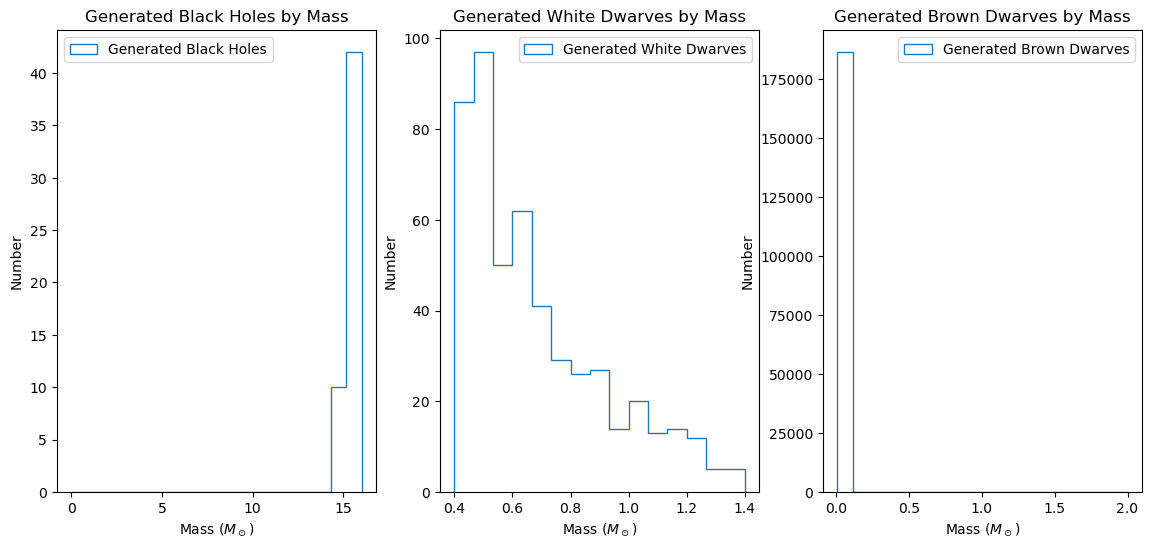

In [294]:
# Locate BHs, NSs, WDs, and BDs
p2_bh = np.where(kc_out['phase'] == 103)[0]
c_bh = np.where(kc_comp['phase'] == 103)[0]
k_bh = np.concatenate([p2_bh, c_bh])
p2_ns = np.where(kc_out['phase'] == 102)[0]
c_ns = np.where(kc_comp['phase'] == 102)[0]
k_ns = np.concatenate([p2_ns, c_ns])
p2_wd = np.where(kc_out['phase'] == 101)[0]
c_wd = np.where(kc_comp['phase'] == 101)[0]
k_wd = np.concatenate([p2_wd, c_wd])
p2_bd = np.where(kc_out['phase'] == 99)[0]
c_bd = np.where(kc_comp['phase'] == 99)[0]
k_bd = np.concatenate([p2_bd, c_bd])

# Plot on histograms
bh_bins = np.linspace(0.01, 16, 20)
wd_bins = np.linspace(0.4, 1.4, 16)
bd_bins = np.linspace(0.01, 2, 20)

plt.figure(figsize=(14,6))
plt.subplot(1, 3, 1)
plt.hist(kc_comp[c_bh]['mass'], histtype = 'step',
        bins = bh_bins, label = 'Generated Black Holes')
plt.title("Generated Black Holes by Mass")
plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('Number')
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(kc_out[k_wd]['mass'], histtype = 'step',
        bins = wd_bins, label = 'Generated White Dwarves')
plt.title("Generated White Dwarves by Mass")
plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('Number')
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(kc_comp['mass'][need_bd], histtype = 'step',
        bins = bd_bins, label = 'Generated Brown Dwarves')
plt.title("Generated Brown Dwarves by Mass")
plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('Number')
plt.legend()

plt.show()

In [228]:
# Checking that objects are in the correct mass ranges
print("BH prim max mass: " + str(np.max(kc_out['mass'][p2_bh])))
print("BH prim min mass: " + str(np.min(kc_out['mass'][p2_bh])))
print("BH comp max mass: " + str(np.max(kc_comp['mass'][c_bh])))
print("BH comp min mass: " + str(np.min(kc_comp['mass'][c_bh])) + '\n')

print("NS prim max mass: " + str(np.max(kc_out[p2_ns]['mass'])))
print("NS prim min mass: " + str(np.min(kc_out[p2_ns]['mass'])))
print("NS comp max mass: " + str(np.max(kc_comp[c_ns]['mass'])))
print("NS comp min mass: " + str(np.min(kc_comp[c_ns]['mass'])) + '\n')

print("WD prim max mass: " + str(np.max(kc_out[p2_wd]['mass'])))
print("WD prim min mass: " + str(np.min(kc_out[p2_wd]['mass'])))
print("WD comp max mass: " + str(np.max(kc_comp[c_wd]['mass'])))
print("WD comp min mass: " + str(np.min(kc_comp[c_wd]['mass'])) + '\n')

print("BD prim max mass: " + str(np.max(kc_out[p2_bd]['mass'])))
print("BD prim min mass: " + str(np.min(kc_out[p2_bd]['mass'])))
print("BD comp max mass: " + str(np.max(kc_comp[c_bd]['mass'])))
print("BD comp min mass: " + str(np.min(kc_comp[c_ns]['mass'])) + '\n')

BH prim max mass: 119.89570218214551
BH prim min mass: 15.025999572935213
BH comp max mass: 119.37716775564101
BH comp min mass: 15.009358951094368

NS prim max mass: 119.61968070913697
NS prim min mass: 9.002475201776234
NS comp max mass: 115.47061424546564
NS comp min mass: 9.00056928420967

WD prim max mass: 8.999794986324147
WD prim min mass: 5.311067490186374
WD comp max mass: 8.99707592319193
WD comp min mass: 5.311666754267032

BD prim max mass: 0.07999992186315226
BD prim min mass: 0.01000001336207612


ValueError: zero-size array to reduction operation maximum which has no identity

In [188]:
print(np.max(kc_out[k_wd]['mass']))
print(np.min(kc_out[k_wd]['mass']))

print(np.max(kc_out[p2_bh]['mass']))
print(np.min(kc_out[p2_bh]['mass']))

88.54164657710947
0.010059908098432945
118.80539890808666
15.000513183956517


In [172]:
print(kc_out[c_wd])

        mass         isMultiple ...     m_hst_f153m     N_companions
-------------------- ---------- ... ------------------- ------------
  0.6586795096056381      False ...   5.025295725472892            0
  3.8427510670284337       True ... -0.6509998709738373            1
  0.2863865166483995      False ...  7.2088768596764785            0
  0.7742048335787876      False ...   4.460668851429343            0
 0.10766124147681298       True ...   8.760423625411967            1
 0.02589910470529386      False ...                 nan            0
  0.5326011325857933      False ...   5.718004847207575            0
                 ...        ... ...                 ...          ...
 0.07207704463160401      False ...                 nan            0
  0.2901218613714232       True ...   6.513996744341199            1
  0.8377075545324469      False ...   4.199858747334578            0
0.035545417415318484      False ...                 nan            0
 0.10799622753582329      False ..

In [174]:
# Finding the minimum mass of generated black holes
print("Smallest mass of a primary generated black hole: " + str(np.min(kc_out[p2_bh]['mass'])))
print("Smallest mass of a companion generated black hole: " + str(np.min(kc_out[c_bh]['mass'])))

Smallest mass of a primary generated black hole: 15.005003818897485
Smallest mass of a companion generated black hole: 0.010053181629822302


In [173]:
# Finding the minimum mass of generated objects
print("Smallest mass of a primary generated object: " + str(np.min(kc_out['mass'])))
print("Smallest mass of a companion generated object: " + str(np.min(kc_comp['mass'])))

Smallest mass of a primary generated object: 0.010000087950739485
Smallest mass of a companion generated object: 0.010000111957749505


In [ ]:
# Finding the minimum/maximum inital masses of generated black holes
print("Initial mass of smallest generated black hole: " + str(np.min(kc_out[k_bh]['mass'])))
print("Initial mass of largest generated black hole: " + str(np.max(kc_out[k_bh]['mass'])))

These statements show us that there is an issue with substellar-mass companions being erroneously identified as black holes and other compact remnants, but the issue does not extend to primary mass objects. Thus, we must introduce a bugfix to filter out this error.

In [ ]:
# Create IMF objects                                                                                                                                                     
imf_multi_resolved = multiplicity.MultiplicityResolvedDK()
c3_imf = imf.Weidner_Kroupa_2004(multiplicity=imf_multi_resolved)

In [ ]:
# Make cluster
cluster_mass = 10**6
cluster3 = synthetic.ResolvedCluster(my_iso, c3_imf, cluster_mass, ifmr=my_ifmr)

# Get outputs
c3_out = cluster3.star_systems
c3_comp = cluster3.companions

In [ ]:
# Locate BHs, NSs and WDs
p3_bh = np.where(c3_out['phase'] == 103)[0]
c3_bh = np.where(c3_comp['phase'] == 103)[0]
k3_bh = np.concatenate([p3_bh, c3_bh])
p3_ns = np.where(c3_out['phase'] == 102)[0]
c3_ns = np.where(c3_comp['phase'] == 102)[0]
k3_ns = np.concatenate([p3_ns, c3_ns])
p3_wd = np.where(c3_out['phase'] == 101)[0]
c3_wd = np.where(c3_comp['phase'] == 101)[0]
k3_wd = np.concatenate([p3_wd, c3_wd])

# Plot on histograms
bh_bins = np.linspace(0.01, 16, 20)
wd_bins = np.linspace(0.4, 1.4, 16)

plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
plt.hist(c3_out[k3_bh]['mass'], histtype = 'step',
        bins = bh_bins, label = 'Generated Black Holes')
plt.title("Generated Black Holes by Mass")
plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('Number')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(c3_out[k3_wd]['mass'], histtype = 'step',
        bins = wd_bins, label = 'Generated White Dwarves')
plt.title("Generated White Dwarves by Mass")
plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('Number')
plt.legend()

plt.show()

This is still the case when the companion objects are resolved.

In [276]:
    # Now to create the cluster.
imf_mass_limits = np.array([0.01, 0.07, 0.5, 1, np.inf])
imf_powers = np.array([-0.3, -1.3, -2.3, -2.3])

    ##########
    # Start without multiplicity and IFMR
    ##########
""" my_imf1 = imf.IMF_broken_powerlaw(imf_mass_limits, imf_powers,
                                      multiplicity=None)
    print('Constructed IMF: %d seconds' % (time.time() - startTime)) 
    
    cluster1 = syn.ResolvedCluster(my_iso, my_imf1, cluster_mass, ifmr=ifmr_obj)
    clust1 = cluster1.star_systems
    print('Constructed cluster: %d seconds' % (time.time() - startTime))"""

   
    ##########
    # Test with multiplicity and IFMR
    ##########
multi = multiplicity.MultiplicityUnresolved()
my_imf2 = imf.IMF_broken_powerlaw(imf_mass_limits, imf_powers,
                                      multiplicity=multi)

    
cluster2 = synthetic.ResolvedCluster(my_iso, my_imf2, cluster_mass, ifmr=my_ifmr)
clust2 = cluster2.star_systems
comps2 = cluster2.companions

Brown dwarf indices: (array([     0,      1,      2, ..., 693572, 693573, 693574]),), Masses:         mass        
--------------------
 0.03330731848800373
0.045130822625746865
 0.04311839070080252
0.036366767190959895
0.034795730457169875
 0.07590327272894272
 0.04405898676312338
                 ...
0.022974850570129105
 0.07743240221765976
 0.06465930761239451
0.020632183162231716
 0.04965218683400625
0.021590467618339538
 0.06019784339988129
Length = 682107 rows
Found 179 stars out of mass range
Brown dwarf indices: (array([], dtype=int64),), Masses: mass
----
Found 143800 companions out of stellar mass range


In [277]:
bd_idx = np.where(comps2['phase'] == 99)
print(comps2[bd_idx])

system_idx mass Teff  L  logg isWR mass_current phase metallicity m_hst_f153m
---------- ---- ---- --- ---- ---- ------------ ----- ----------- -----------
